# Synthetic Data

In [ ]:
!pip install sdv==1.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of rdt to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 7.3 MB/s eta 0:00:00


## Train synthetic data synthesizer

In [ ]:
import sdv
import pandas as pd

In [ ]:
# Load the dataset
real_data = pd.read_csv("Real-like Fake Data.csv")
real_data.head()

,First name,Last name,Age,Gender,Household-Income,Household-Zone,State,Car-Make,Car-Model,Car-Colour,Loan-Amount
0,Ikey,Dowty,30,Male,114000,Highly Rural,NY,Porsche,911,Purple,42000
1,Magda,Nealand,45,Female,113000,Rural,NV,Porsche,911,Purple,50000
2,Natalya,Offner,41,Female,153000,Highly Rural,TX,Porsche,911,Red,15000
3,Yasmin,Findlow,46,Female,238000,Suburban,NJ,Porsche,911,Blue,91000
4,Ericha,Dressel,47,Female,133000,Highly Rural,FL,Mercedes-Benz,300E,Green,95000


In [ ]:
# Merge first name and last name
combine = lambda  a, b: a + " " + b
real_data["Name"] = combine(real_data["First name"], real_data["Last name"])

real_data = real_data.drop(["First name", "Last name"], axis=1)
real_data.head()

,Age,Gender,Household-Income,Household-Zone,State,Car-Make,Car-Model,Car-Colour,Loan-Amount,Name
0,30,Male,114000,Highly Rural,NY,Porsche,911,Purple,42000,Ikey Dowty
1,45,Female,113000,Rural,NV,Porsche,911,Purple,50000,Magda Nealand
2,41,Female,153000,Highly Rural,TX,Porsche,911,Red,15000,Natalya Offner
3,46,Female,238000,Suburban,NJ,Porsche,911,Blue,91000,Yasmin Findlow
4,47,Female,133000,Highly Rural,FL,Mercedes-Benz,300E,Green,95000,Ericha Dressel


In [ ]:
# Create metadata
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

# Task: Use SDV to infer metadata and validate the metadata
metadata.detect_from_dataframe(data=real_data)

metadata.update_column(column_name='Name', sdtype='name', pii=True)
metadata.update_column(column_name='Car-Model', sdtype='categorical')

print(metadata)
metadata.validate()

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "Age": {
            "sdtype": "numerical"
        },
        "Gender": {
            "sdtype": "categorical"
        },
        "Household-Income": {
            "sdtype": "numerical"
        },
        "Household-Zone": {
            "sdtype": "categorical"
        },
        "State": {
            "sdtype": "categorical"
        },
        "Car-Make": {
            "sdtype": "categorical"
        },
        "Car-Model": {
            "sdtype": "categorical"
        },
        "Car-Colour": {
            "sdtype": "categorical"
        },
        "Loan-Amount": {
            "sdtype": "numerical"
        },
        "Name": {
            "sdtype": "name",
            "pii": true
        }
    },
    "primary_key": "Name"
}


In [ ]:
# Train synthesizer using real data and metadata
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(metadata, name="FAST_ML")
synthesizer.fit(data=real_data)

## Generate synthetic data

In [ ]:
# Generate 500 entries using the trained synthesizer
synthesizer.save('synthesizer.pkl')
synthesizer = SingleTablePreset.load('synthesizer.pkl')

synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head(10)

,Age,Gender,Household-Income,Household-Zone,State,Car-Make,Car-Model,Car-Colour,Loan-Amount,Name
0,79,Male,169001,Urban,OR,Mercedes-Benz,Express 3500,Green,54410,Lance Thomas
1,63,Female,175179,Highly Urban,CA,Suzuki,Civic,Purple,32013,Monique Mcmahon
2,19,Male,207787,Rural,NY,Suzuki,Endeavor,Yellow,88161,Caroline Schmitt
3,29,Male,49326,Urban,GA,Lexus,A4,Red,76271,Colin Thompson
4,22,Male,175349,Suburban,IA,BMW,Outlander,Red,21108,Doris Montgomery
5,38,Female,137502,Highly Urban,IL,Mercedes-Benz,X6 M,Green,68321,Chase Reid
6,64,Male,241707,Highly Urban,CA,Jeep,911,Purple,46080,Jackson Howe
7,79,Male,175635,Urban,CT,Ford,F350,Black,43214,Cheryl Rivera
8,60,Female,156824,Highly Urban,GA,Mitsubishi,Mustang,Orange,1000,Kathleen Morton
9,29,Male,104012,Highly Urban,GA,Suzuki,M3,Red,100000,Dave Phillips


## Evaluate: Data Quality

[]

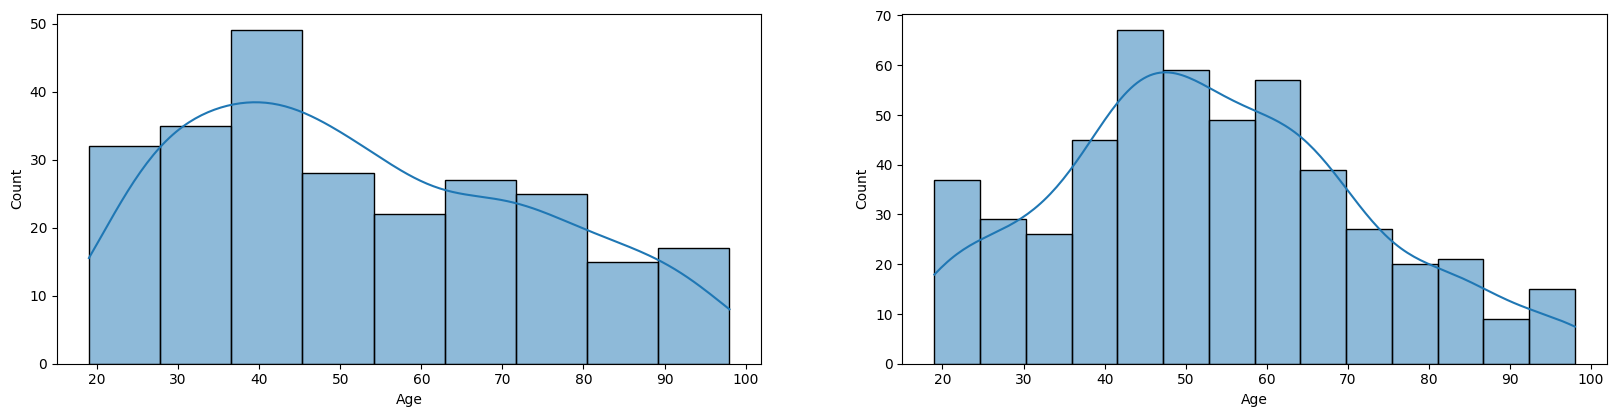

In [ ]:
# Plot distribution of age data for real and synthetic data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(real_data["Age"], kde=True)

plt.subplot(2,2,2)
sns.histplot(synthetic_data["Age"], kde=True)

plt.plot()

[]

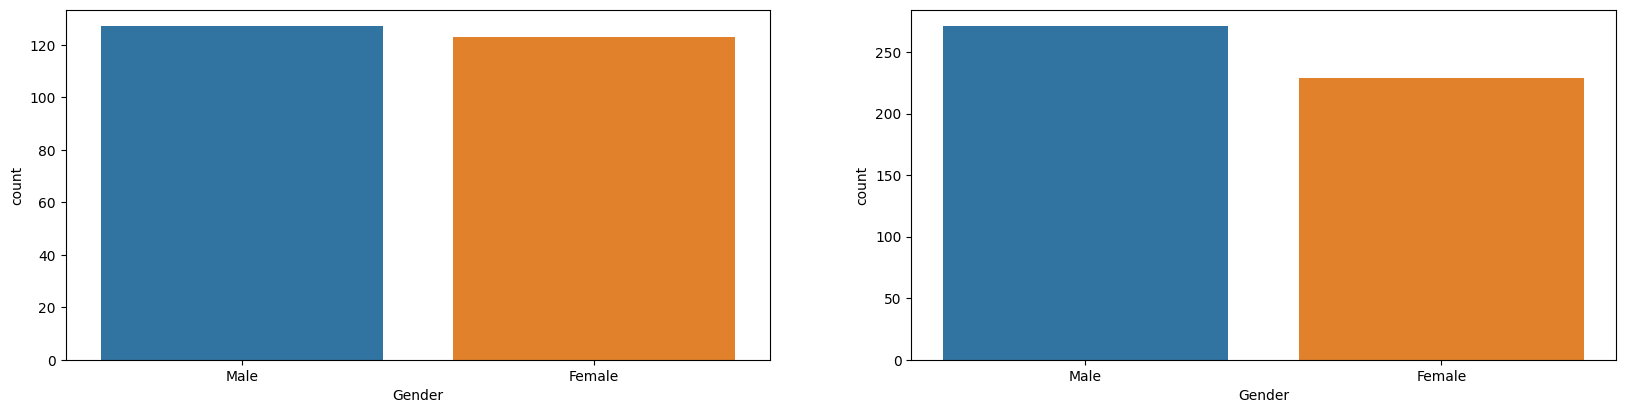

In [ ]:
# Plot distribution of age data for real and synthetic data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(x="Gender", data=real_data)

plt.subplot(2,2,2)
sns.countplot(x="Gender", data=synthetic_data)

plt.plot()

In [ ]:
# Generate evaluation metrics
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:01<00:00, 27.61it/s]

Overall Quality Score: 77.62%

Properties:
- Column Shapes: 88.96%
- Column Pair Trends: 66.29%


In [ ]:
# Compare overlap in histogram distribution
# KSComplement: Numerical
# TVComplement: Categorical

quality_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,Age,KSComplement,0.892
1,Gender,TVComplement,0.966
2,Household-Income,KSComplement,0.930
3,Household-Zone,TVComplement,0.888
4,State,TVComplement,0.840
5,Car-Make,TVComplement,0.870
6,Car-Model,TVComplement,0.854
7,Car-Colour,TVComplement,0.884
8,Loan-Amount,KSComplement,0.882


In [ ]:
# Column pair correlations
# Numerical: CorrelationSimilarity
# Categorical: ContingencySimilarity

quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,Age,Gender,ContingencySimilarity,0.840000,NaN,NaN
1,Age,Household-Income,CorrelationSimilarity,0.996686,-0.036099,-0.042726
2,Age,Household-Zone,ContingencySimilarity,0.786000,NaN,NaN
3,Age,State,ContingencySimilarity,0.506000,NaN,NaN
4,Age,Car-Make,ContingencySimilarity,0.596000,NaN,NaN
5,Age,Car-Model,ContingencySimilarity,0.400000,NaN,NaN
6,Age,Car-Colour,ContingencySimilarity,0.694000,NaN,NaN
7,Age,Loan-Amount,CorrelationSimilarity,0.969545,-0.027707,0.033203
8,Gender,Household-Income,ContingencySimilarity,0.832000,NaN,NaN
9,Gender,Household-Zone,ContingencySimilarity,0.888000,NaN,NaN
